In [19]:
import numpy as np
import matplotlib.pyplot as plt

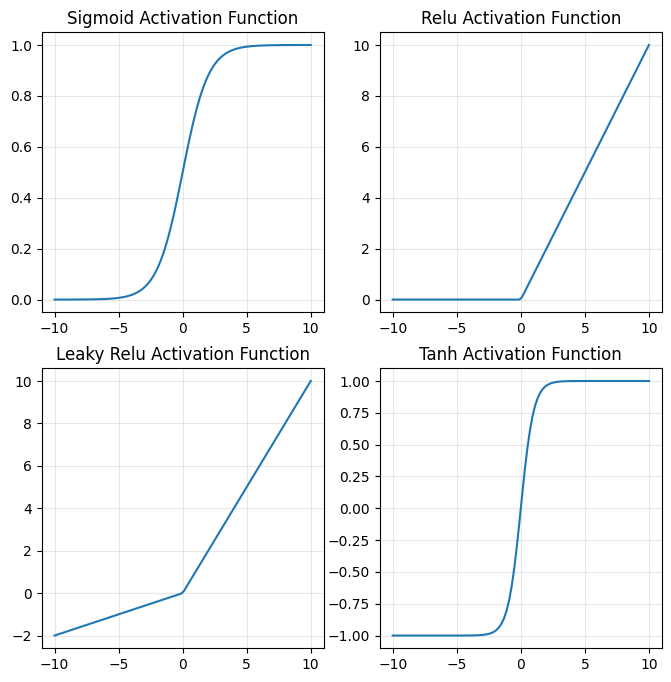

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#recified linear unit
def relu(x):
    return np.maximum(0,x)

def leaky_relu(x, alpha=0.2):
    return np.where(x>0, x, alpha*x)

def tanh(x):
    return np.tanh(x)


x = np.linspace(-10, 10,100)

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.plot(x,sigmoid(x))
plt.title("Sigmoid Activation Function")
plt.grid(alpha=0.3)

plt.subplot(2,2,2)
plt.plot(x,relu(x))
plt.title("Relu Activation Function")
plt.grid(alpha=0.3)

plt.subplot(2,2,3)
plt.plot(x,leaky_relu(x))
plt.title("Leaky Relu Activation Function")
plt.grid(alpha=0.3)

plt.subplot(2,2,4)
plt.plot(x,tanh(x))
plt.title("Tanh Activation Function")
plt.grid(alpha=0.3)

In [21]:
#hours_of_sleep  | cups_of_coffee. | travel_time.     |.    productivity score
#Data

In [22]:
#sythtic data
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
# from sklearn.model_selection import train_test_split

In [23]:
import numpy as np
np.random.seed(20)
num_samples = 1000
X = np.random.rand(num_samples, 3) * np.array([24,10,60])
Y = np.random.rand(num_samples) * 100
print(X)
len(X)

[[14.11513923  8.97713728 53.49184377]
 [19.58009946  0.35889586 41.50545491]
 [ 9.08834261  5.18510945 39.47708793]
 ...
 [18.07168793  9.25874656 58.82334631]
 [11.32354344  5.72849326 43.65380456]
 [19.43338616  8.60831454 38.60528658]]


1000

In [24]:
pd.DataFrame(X, columns=['hours_of_sleep',"cups_of_coffee","travel_time"]).head(5)

,hours_of_sleep,cups_of_coffee,travel_time
0,14.115139,8.977137,53.491844
1,19.580099,0.358896,41.505455
2,9.088343,5.185109,39.477088
3,4.652405,2.723164,43.116356
4,18.792087,8.503276,46.514694


In [25]:
def create_custom_model():
    #input
    inputs = keras.Input(shape=(3,))

    #hidden layer
    x = layers.Dense(3, activation='sigmoid')(inputs)

    #output
    outputs = layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [26]:
model = create_custom_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
             loss = "mean_squared_error")

In [27]:
print(model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
history = model.fit(X, Y, epochs=150, batch_size=32, validation_split=0.20, verbose=1)

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3399.1199 - val_loss: 3286.7593
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3104.8311 - val_loss: 3110.0632
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3013.2622 - val_loss: 3006.9897
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2948.2278 - val_loss: 2911.8606
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2732.1160 - val_loss: 2823.0913
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2830.0410 - val_loss: 2736.3289
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2564.9248 - val_loss: 2653.6799
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2504.8433 - val_loss: 2574.5813
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2377.7644 - val_loss: 2498.0488
Epoch 10/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2517.0264 - val_loss: 2423.5327
Epoch 11/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2418.4685 - val_loss: 2352.1

In [29]:
test_loss = model.evaluate(X,Y,verbose=1) #0,1,2
print(f"Test Loss : {test_loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 845.8910
Test Loss : 834.5162963867188


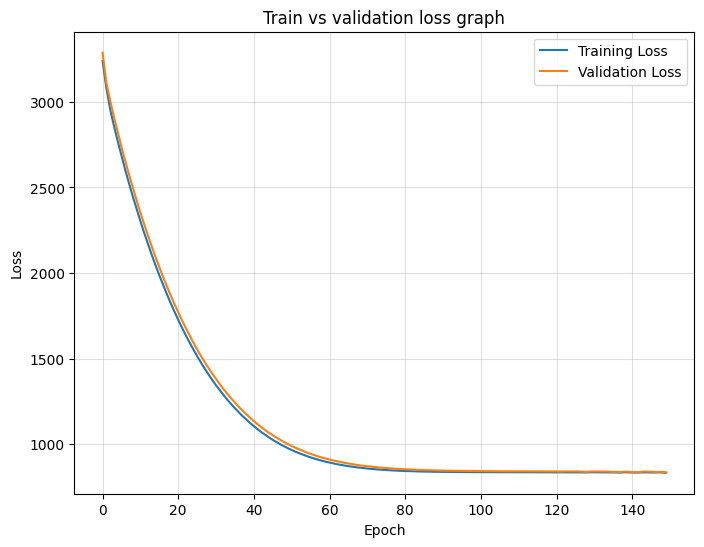

In [30]:
#plot -
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Train vs validation loss graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(alpha=0.4)
plt.legend()

In [31]:
hours_of_sleep =	10
cups_of_coffee = 10
travel_time = 30

sample_data = np.array([[hours_of_sleep, cups_of_coffee, travel_time]])

prediction = model.predict(sample_data)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[51.30744]], dtype=float32)

model 2

In [37]:
model2 = create_custom_model()
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
             loss = "mean_squared_error")


In [38]:
print(model2.summary())

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [39]:
history = model2.fit(X, Y, epochs=150, batch_size=32, validation_split=0.20, verbose=1)

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3309.1082 - val_loss: 3307.8647
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3274.8000 - val_loss: 3216.4863
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3140.4741 - val_loss: 3136.6086
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2906.4832 - val_loss: 3062.4622
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2967.7031 - val_loss: 2991.8110
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2842.1570 - val_loss: 2924.2512
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2780.4033 - val_loss: 2857.8896
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2771.3765 - val_loss: 2793.7798
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2585.4292 - val_loss: 2731.8872
Epoch 10/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2544.7925 - val_loss: 2670.4573
Epoch 11/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2598.2891 - val_loss: 2610.7

In [40]:
test_loss = model.evaluate(X,Y,verbose=1) #0,1,2
print(f"Test Loss : {test_loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 845.8910  
Test Loss : 834.5162963867188


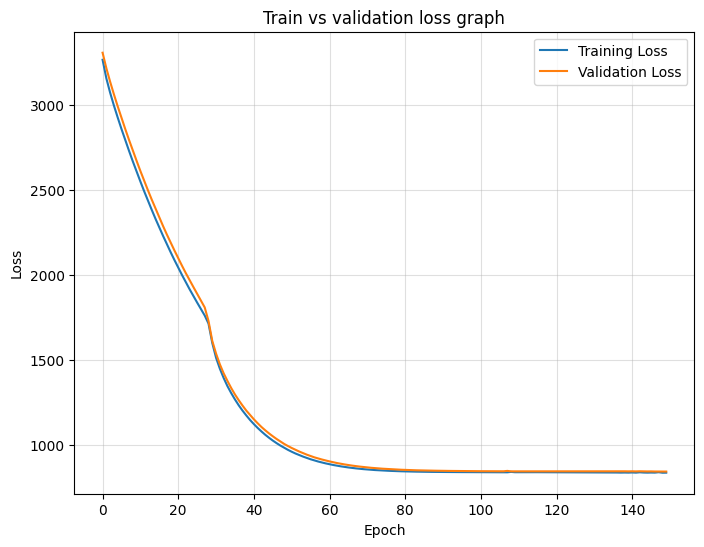

In [41]:
#plot -
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Train vs validation loss graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(alpha=0.4)
plt.legend()